In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

C:\Users\Shashank\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Use a raw string by prefixing the path with 'r'
heart = pd.read_csv("heart.csv")
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

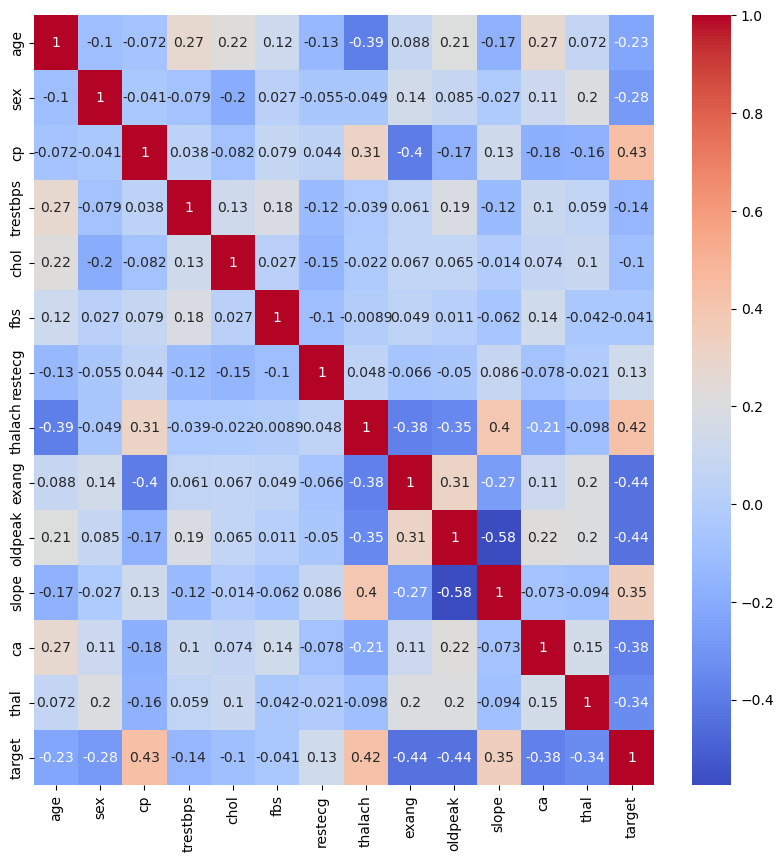

In [6]:
cor = heart.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(cor, annot=True, cmap = 'coolwarm')
plt.show()

In [7]:
discrete_features, continuous_features = [], [] # to separate discrete and continuous features.
for feature in heart.columns:
    if feature == 'target':
        label = ['target']
    elif len(heart[feature].unique()) >= 10:
        continuous_features.append(feature)
    else:
        discrete_features.append(feature)

print('Discrete: ', discrete_features, '\n', 'Continuous', continuous_features)

Discrete:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] 
 Continuous ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


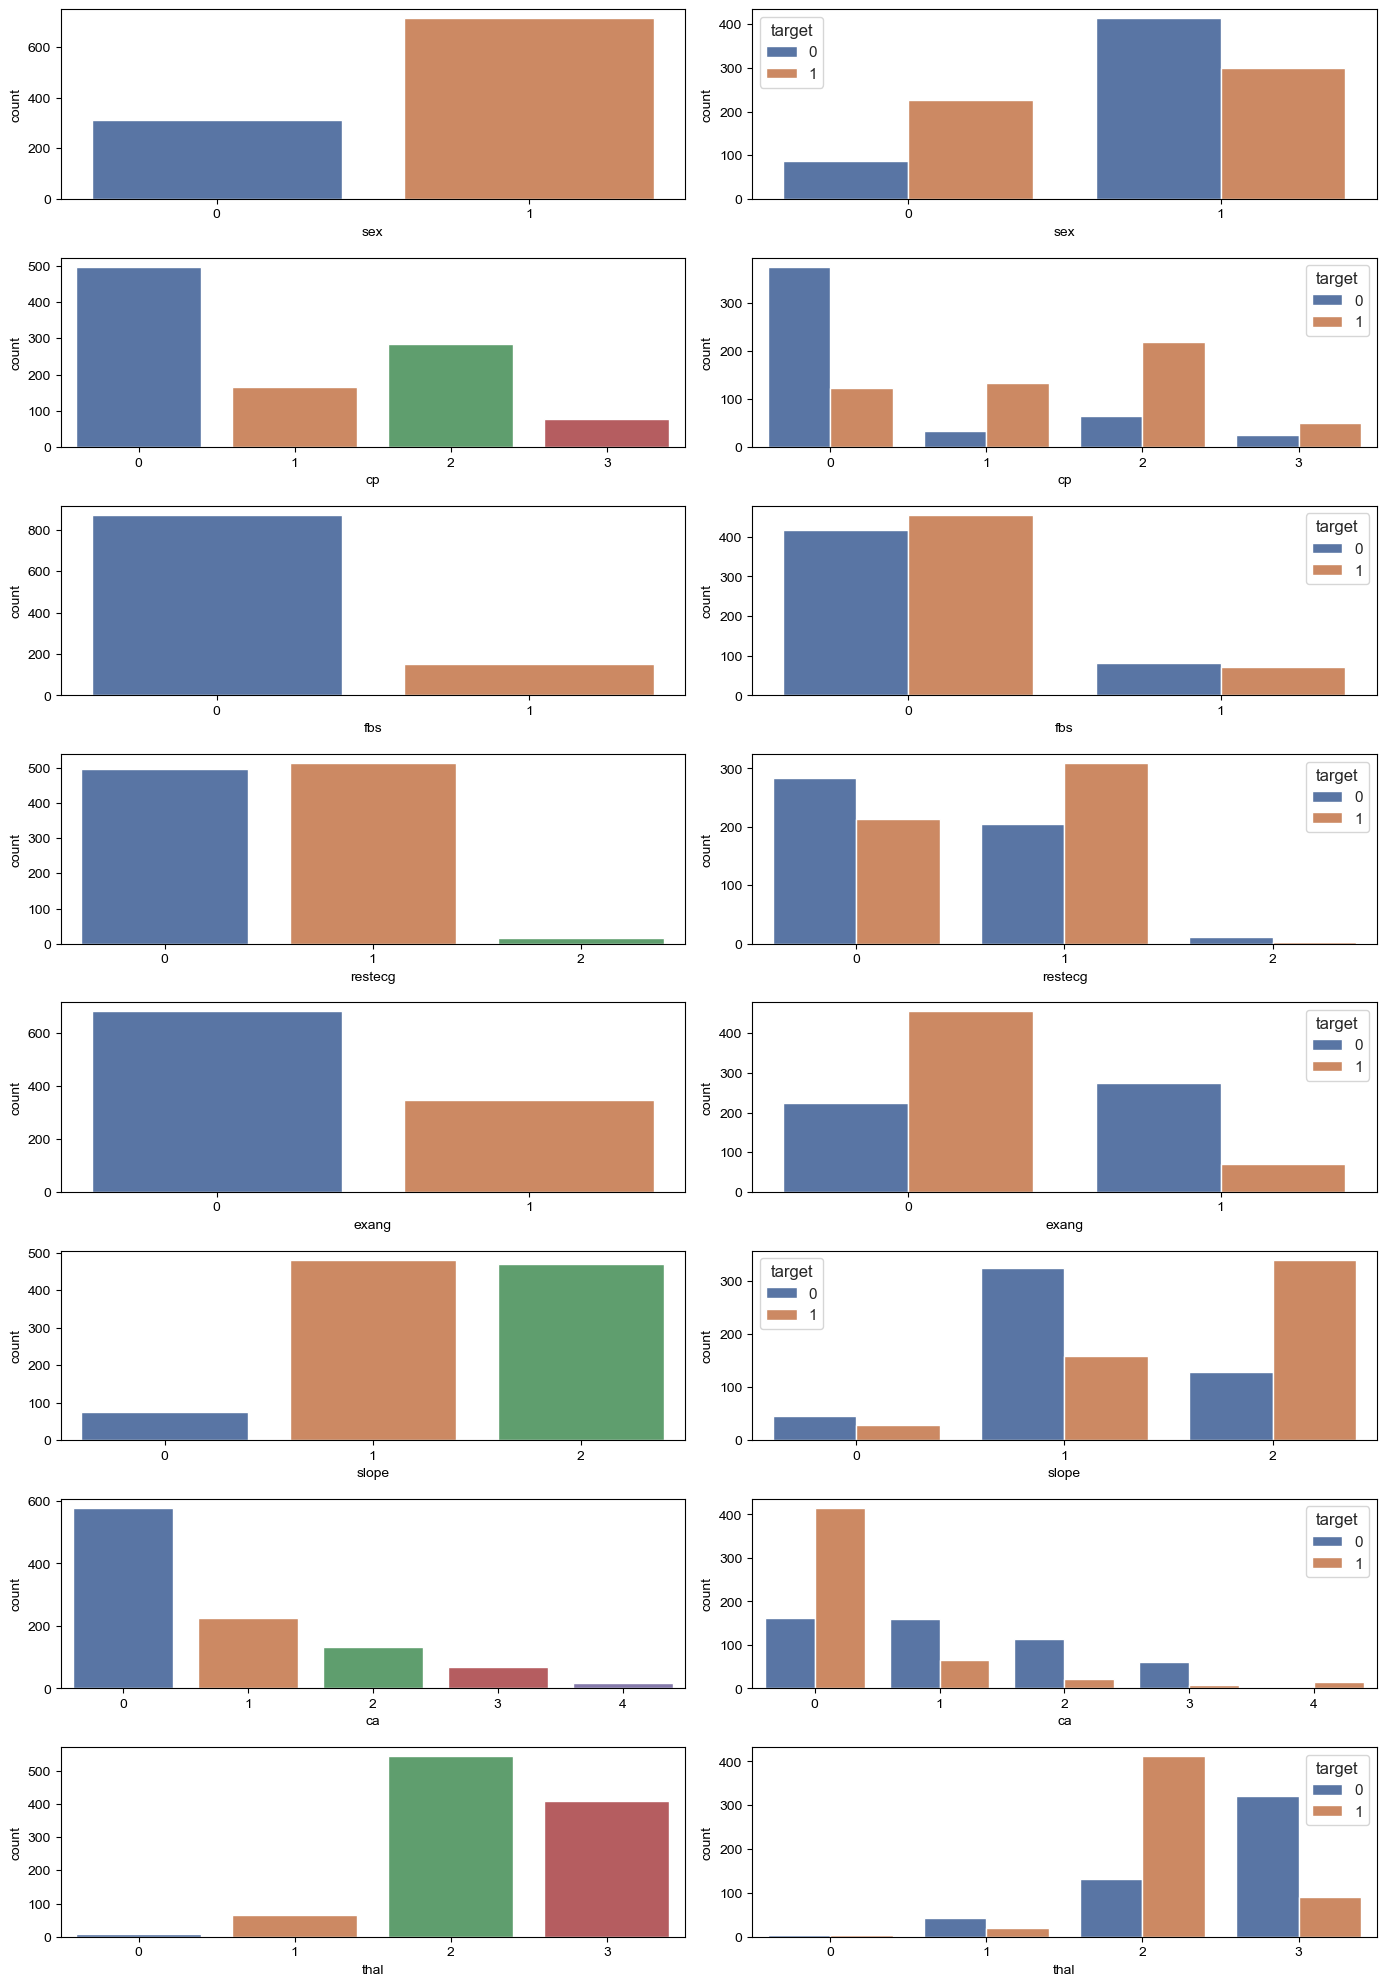

In [8]:
fig, ax = plt.subplots(len(discrete_features), 2, figsize=(14,20))

for i in range(len(discrete_features)):
    sns.set_theme(style="whitegrid")
    sns.countplot(ax=ax[i, 0], x=discrete_features[i], data = heart)
    sns.countplot(ax=ax[i, 1], x=discrete_features[i], hue = 'target', data = heart)
fig.tight_layout(pad=1)
plt.show()

In [9]:
X=heart.drop(['target'], axis =1)
y=heart['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.9853658536585366


In [13]:
score1=dt.score(X_test,y_test)

In [14]:
from sklearn.linear_model import LogisticRegression

df= LogisticRegression()
df.fit(X_train,y_train)

C:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
from sklearn.metrics import accuracy_score
y_pred = df.predict(X_test)

# Evaluate the model's performance
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.9853658536585366


In [16]:
score2=df.score(X_test,y_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
df1= RandomForestClassifier()
df1.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
from sklearn.metrics import accuracy_score
y_pred = df1.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.9853658536585366


In [19]:
score3=df1.score(X_test,y_test)

In [20]:
from sklearn.svm import SVC
df2 = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
df2.fit(X_train, y_train)

SVC(kernel='linear', shrinking=False)

In [21]:
from sklearn.metrics import accuracy_score
y_pred = df2.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy3)

Accuracy : 0.8048780487804879


In [22]:
score4=df2.score(X_test,y_test)

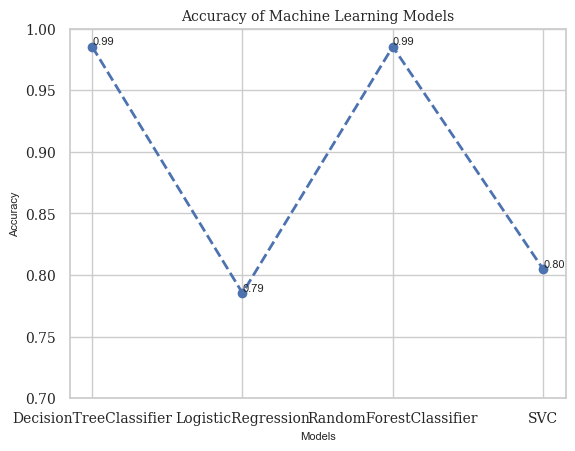

In [24]:
models = ['DecisionTreeClassifier', 'LogisticRegression','RandomForestClassifier', 'SVC']
scores_test = [score1, score2, score3, score4]
plt.plot(models, scores_test, marker='o', linestyle='--',linewidth=2)

# Adding labels and title
plt.xlabel('Models',fontsize=8)
plt.ylabel('Accuracy',fontsize=8)
plt.title('Accuracy of Machine Learning Models',fontsize=10, fontfamily='serif')

for i, acc in enumerate(scores_test):
    plt.text(models[i], acc, f'{acc:.2f}', ha='left', va='bottom', fontsize=8)

# Display the plot

# Display the plot
plt.grid(True)  # Add grid lines for better visualization
plt.ylim(0.7, 1)  # Set y-axis limits
plt.xticks(fontsize=10, fontfamily='serif') 
plt.yticks(fontsize=10, fontfamily='serif')
 
plt.show()